<center><h1>Rafinha dos dados</h1></center>

<img src="logo_rafinha.png" style='height: 530px'>

# Parte 1: Preciso de código pra fazer um bom modelo?

Vamos colocar em uma célula só todos os passos que fizemos na aula anterior pra "sentir" o quão complexo é fazer um modelo

Caso tenha curiosidade, quando você está com a célula selecionada, você pode ir em "View" e "Toggle Line Numbers" para enumerar as linhas

In [1]:
# Leitura da base de dados
import pandas as pd
df = pd.read_csv('2feats.csv') 

# Separação em variável preditiva e variável resposta
X = df[['goout','absences']] 
y = df['target']

# Separação em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3,random_state=42) 

# Busca nos parametros para encontrar o melhor modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
max_depths = [2,3,4,5,6,7,8,9,10] 
f1s = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth,random_state=123)
    dt.fit(X_treino,y_treino)
    y_pred = dt.predict(X_teste)
    f1 = f1_score(y_teste, y_pred)
    
    f1s.append( f1 )
    print( '{max_depth} - {f1:5.4f}'.format(max_depth=max_depth, f1=f1s[-1]) )

# Qual parametros é o melhor?
import numpy as np
best = max_depths[ np.argmax(f1s) ]

# Ajuste do melhor modelo com a base completa
dt.fit(X, y)

# Salvar o melhor modelo em um arquivo
import joblib
joblib.dump(dt, 'modelo_dt.joblib')

2 - 0.4118
3 - 0.4737
4 - 0.4375
5 - 0.4242
6 - 0.4571
7 - 0.4571
8 - 0.4571
9 - 0.4118
10 - 0.4571


['modelo_dt.joblib']

Viu como não é nada do outro mundo? 

Com 36 linhas, nós lemos a base de dados, fizemos uma busca em um dos parâmetros, encontramos o melhor (`max_depth=3`, pois maximiza a métrica F1), treinamos um modelo com o conjunto completo dos dados e ainda salvamos o modelo! E tudo com comentários!

Eu lembro quando eu aprendi a programar um basiquinho em C, um programa que não faz ABSOLUTAMENTE NADA tem no mínimo 10 linhas. Qualquer coisa um pouco mais interessante passa rapidamente de 50 ou 100 linhas de código. Aqui, conseguimos ter um modelo consideravelmente complexo com poucas e linhas

E se quisermos trocar o modelo de árvore de decisão para outro tipo de modelo, é POUQUÍSSIMA coisa que temos que alterar, como veremos nas próximas aulas

Mas o trabalho do cientista de dados "é mole" então? Nem um pouco! Só que o diferencial não está em fazer super códigos ultra complexos, está em saber o que fazer, ter clareza do que está sendo feito.

E mais ainda: Saber interpretar o que foi feito para aprender algo com esses dados, e tomar uma melhor decisão

Em resumo:

# Difícil não é programar. Difícil é saber o que fazer com o modelo.
# Difícil é VOCÊ aprender algo com os dados

In [2]:
print('O melhor max_depth foi {best}'.format(best=best))
dt = DecisionTreeClassifier(max_depth=best,random_state=42)
dt.fit(X_treino, y_treino)

from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_teste, dt.predict(X_teste))
recall = recall_score(y_teste, dt.predict(X_teste))
print('Precision: {p}'.format(p=precision))
print('Recall: {p}'.format(p=recall))

O melhor max_depth foi 3
Precision: 0.6
Recall: 0.391304347826087


In [23]:
y_teste.mean()

0.19327731092436976

In [24]:
dt.predict(X_teste).mean()

0.12605042016806722

O que aprendemos com isso? Vamos nos recordar do problema: Queremos detectar estudantes com um problema de alcolismo para encaminhá-los para uma psicóloga qualificada.

Vamos lá, em CONJUNTO TESTE, em dados que o modelo nunca viu antes durante o treinamento:
 - <b>Precision</b>: De todos que o modelo solicitou que encaminhássemos para a psicóloga, 60% realmente tinham um problema. Isso quer dizer que <u>estamos desperdiçando nosso recurso (tempo da psicóloga) 40% das vezes</u>. Lembrando que caso enviássemos alunos aleatoriamente para a psicóloga, como há 20% dos estudantes com problemas, desperdissaríamos 80% das vezes.
 - <b>Recall</b>: De todos os alunos alcolistas, detectamos 40% deles. Lembrando que o modelo solicitou que encaminhássemos somente 12.6% dos alunos para a psicóloga (linha `dt.predict(X_teste).mean()`: Qual a fração de preditos como alcolista em relação a base toda). Ou seja: Apesar de enviarmos pouca gente, acertamos até que bem.

In [3]:
dt.predict(X_teste)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1])

In [4]:
dt.predict(X_teste).sum(),len(X_teste)

(15, 119)

Aqui vemos números absolutos: de 119 alunos no conjunto teste, 15 foram encaminhados para a psicóloga.

O que da mais de:

# 10% da escola!

Vamos agora supor que nossa psicóloga possui agenda para mais alunos que isso, que ela quer que enviemos mais gente, uma vez que ela sabe que não capturamos todos. Mas queremos mandar somente aqueles que temos um pouco mais de certeza da situação. Como podemos fazer isso?

Será que podemos ordenar?

Para isso, vamos lembrar como nossa árvore de decisão funciona. Vamos VISUALIZAR as regras geradas pela árvore:

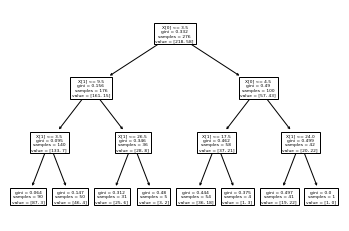

In [5]:
from sklearn.tree import plot_tree

plot_tree(dt);

Muito pequeno. Um pouco maior pra conseguirmos ver....

(Obs.: Ninguém acerta esse gráfico de primeira, todo mundo SEMPRE esquece de ajustar o tamanho, hahaha)

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)
plot_tree(dt,ax=ax);

Vamos olhar pra folha mais da esquerda. Passando pelas regras, a árvore mandou 90 alunos pra lá, sendo que apenas 3 eram alcolistas. 96% deles não tinham nenhum problema. Se formos ordenar, qual o **score de alcolismo** que poderíamos dar para esses alunos: 3/90!
É meio que a "probabilidade de encontrar um aluno alcolista nessa folha". Por razões técnicas não podemos falar que é uma probabilidade mesmo, mas ordena. Quanto maior esse núemro, maior a chance de ser alcolista

In [25]:
3/90

0.03333333333333333

E na próxima folha:

In [26]:
4/50

0.08

"Mas Rafinha, por que não podemos falar que é uma probabilidade????"
Repare a última folha da direita. Somente 1 aluno caiu nela, e não é alcolista!! Isso vai fazer o score dele ser 0. Isso faz TODOS que cairem nessa folha não serão alcolistas, que é o que significa <u>probabilidade</u>? NÃO! 

Isso é um problema de amostragem, tínhamos uma base pequena, e, em particular, somente 1 aluno com a sequência de características que foram filtradas por essa regra. O <u>estimador dessa probabilidade</u> não é bom, ele se distancia muito da *probabilidade real*.

<hr/>

"Mas como podemos pegar esses **scores**?? Vamos ter que ficar vendo em qual folha o estudante caiu??"

Não, já tem uma função pronta pra isso. Ao invés de usarmos a `predict`, vamos usar a `predict_proba`:

In [9]:
dt.predict_proba(X_teste)

array([[0.96666667, 0.03333333],
       [0.96666667, 0.03333333],
       [0.92      , 0.08      ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.96666667, 0.03333333],
       [0.96666667, 0.03333333],
       [0.80645161, 0.19354839],
       [0.96666667, 0.03333333],
       [0.96666667, 0.03333333],
       [0.96666667, 0.03333333],
       [0.92      , 0.08      ],
       [0.96666667, 0.03333333],
       [0.96666667, 0.03333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.96666667, 0.03333333],
       [0.96666667, 0.03333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.46341463, 0.53658537],
       [0.96666667, 0.03333333],
       [0.66666667, 0.33333333],
       [0.96666667, 0.03333333],
       [0.80645161, 0.19354839],
       [0.96666667, 0.03333333],
       [0.96666667, 0.03333333],
       [0.96666667, 0.03333333],
       [0.92      , 0.08      ],
       [0.

O que é essa saída? Note que é um tabelão de 2 colunas. 
 - Cada linha é o score de um aluno.
 - A primeira coluna (coluna 0) é o score de NÃO ser alcolista (target=0)
 - A segunda coluna (coluna 1) é o score de SER acolista (target=1)
 
Tipicamente, estamos interessados somente na segunda coluna
Note que as duas colunas sempre somam 1

Como nossa base é muito *desbalanceada*, existe o efeito que teremos muito mais score de alcolismo baixos que altos, simplesmente porque como temos mais alunos não alcolistas, é mais provável deles cairem em qualquer uma das folhas

<hr />

"Então o que a `predict` faz?

É meio besta, mas é a triste realidade: Ela calcula o predict_proba e chama de 1 todos que tem score maior que 0.50.

"Mas por que 0.50?"

Nenhuma razão. Se fosse uma probabilidade, seria "a classe mais provável". Mas não é. E nosso conjunto é desbalanceado.

Então, infelizmente, a predict escolhe um número "arbitrário". E por causa disso

# No futuro, nós NUNCA devemos usar a predict! Só a predict_proba!

E você usa estudos, que vamos ensinar, pra escolher qual limiar faz mais sentido pra você.

In [10]:
preds1 = dt.predict_proba(X_teste)[:,1] > 0.50
preds2 = dt.predict(X_teste)

preds1 == preds2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Como escolher o limiar?

Primeiro, vamos dar uma olhada na *distribuição* desses score

Vamos fazer um gráfico de barras em que o *eixo-x* são intervalos de score, e o *eixo-y* é a contagem de quantas pessoas cairam naquele intervalo de score:

 - Em azul, o histograma somente para os alunos a classe 0, não alcolistas
 - Em vermelho, o histograma somente para os alunos a classe 1, alcolistas

(array([40., 22.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0., 18.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([0.03333333, 0.05722222, 0.08111111, 0.105     , 0.12888889,
        0.15277778, 0.17666667, 0.20055556, 0.22444444, 0.24833333,
        0.27222222, 0.29611111, 0.32      , 0.34388889, 0.36777778,
        0.39166667, 0.41555556, 0.43944444, 0.46333333, 0.48722222,
        0.51111111, 0.535     , 0.55888889, 0.58277778, 0.60666667,
        0.63055556, 0.65444444, 0.67833333, 0.70222222, 0.72611111,
        0.75      ]),
 <BarContainer object of 30 artists>)

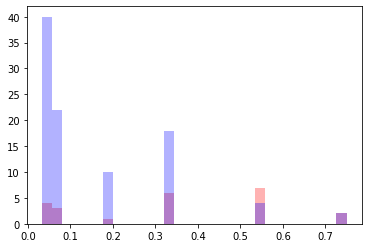

In [11]:
alcolistas  = y_teste==1
nalcolistas = y_teste==0

pred = dt.predict_proba(X_teste)[:,1]

plt.hist(pred[ alcolistas],bins=30,color='r',alpha=.3)
plt.hist(pred[nalcolistas],bins=30,color='b',alpha=.3)

Note que as barras vermelhas são todas muito pequenas. **Isso é efeito do desbalanceamento da base**. 
Pra termos uma comparação justa, vamos usar o parâmetro `density=True`, isso faz com que os 2 histogramas possuam *a mesma área*. 

O que isso quer dizer? Que a altura da barra vermelha agora é *proporcional a probabilidade de encontrar um alcolista quando olhamos praquele intervalo de score*. E similarmente para as barras azuis.

Agora os 2 tem um eixo-y comparável: Uma **estimativa** diretamente proporcional à probabilidade

(array([17.44186047,  9.59302326,  0.        ,  0.        ,  0.        ,
         0.        ,  4.36046512,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  7.84883721,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.74418605,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.87209302]),
 array([0.03333333, 0.05722222, 0.08111111, 0.105     , 0.12888889,
        0.15277778, 0.17666667, 0.20055556, 0.22444444, 0.24833333,
        0.27222222, 0.29611111, 0.32      , 0.34388889, 0.36777778,
        0.39166667, 0.41555556, 0.43944444, 0.46333333, 0.48722222,
        0.51111111, 0.535     , 0.55888889, 0.58277778, 0.60666667,
        0.63055556, 0.65444444, 0.67833333, 0.70222222, 0.72611111,
        0.75      ]),
 <BarContainer object of 30 artists>)

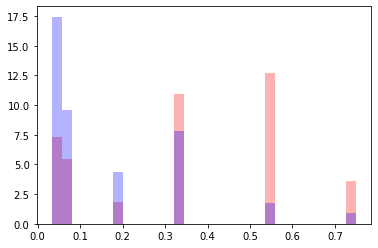

In [12]:
alcolistas  = y_teste==1
nalcolistas = y_teste==0

pred = dt.predict_proba(X_teste)[:,1]

plt.hist(pred[ alcolistas],bins=30,color='r',alpha=.3,density=True)
plt.hist(pred[nalcolistas],bins=30,color='b',alpha=.3,density=True)

Agora sim: Comparando as barras, vemos que se escolhermos um limiar acima de 0.30, vamos mandar mais gente pra psicóloga, como ela pediu, e ainda vamos estar mandando, proporcionalmente, mais alcolistas que não alcolistas, pois a barra vermelha é maior que a azul.

Nessa faixa de score temos PROPORCIONALMENTE mais alcolistas que a média da base, situação que enviaríamos alunos aleatoriamente.

### Mas vamos olhar agora para um outro conceito que vai nos ajudar a olhar pra esses score. O conceito de:

# CURVA ROC

Pra isso, vamos definir 2 indicadores:

# True positive rate (TPR)
Recall = de todos alcolistas, quanto meu modelo acerta?
Quanto mais pra esquerda no histograma, maior

# False positive rate (FPR)
De todos não alcolistas, quantos eu errei e disse que eram?
Quando mais pra esquerda no histograma, maior

<hr/>

Queremos **maximizar** a TPR ao mesmo tempo que **minimizamos** a FPR.

Vamos ver como elas se comportam....

**True Positive Rate em limiar 0.7:**

In [13]:
(pred[alcolistas]>0.7).sum()/len(alcolistas)

0.01680672268907563

**True Negative Rate em limiar 0.7:**

In [14]:
(pred[nalcolistas]>0.7).sum()/len(nalcolistas)

0.01680672268907563

**True Positive Rate em limiar 0.5:**

In [27]:
(pred[alcolistas]>0.5).sum()/len(alcolistas)

0.07563025210084033

**True Negative Rate em limiar 0.5:**

In [28]:
(pred[nalcolistas]>0.5).sum()/len(nalcolistas)

0.05042016806722689

**True Positive Rate em limiar 0.3:**

In [29]:
(pred[alcolistas]>0.5).sum()/len(alcolistas)

0.07563025210084033

**True Negative Rate em limiar 0.3:**

In [30]:
(pred[nalcolistas]>0.5).sum()/len(nalcolistas)

0.05042016806722689

<hr/>

Muito número...vamos ver isso num gráfico?

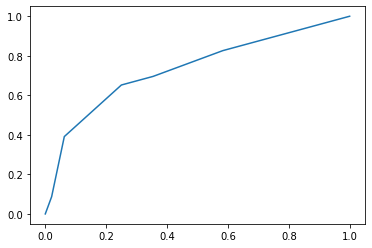

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_teste, dt.predict_proba(X_teste)[:,1])

plt.plot(fpr,tpr)

Plotando de novo pra ficar mais bonitinho......

Text(0, 0.5, 'True positive rate')

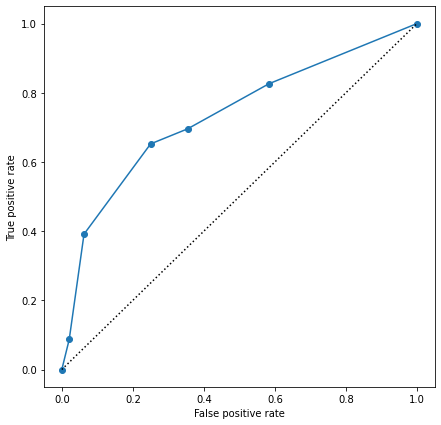

In [16]:
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1],linestyle=':',color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Onde estão os limiares desses pontos? Começamos com o maior limiar possível: 1.0. Esse é o ponto da *esquerda*, o que fica em (0,0). Porquê: com um limiar tão alto, não classificamos NINGUÉM como alcolista. TPR=0. Mas também não classificamos errado nenhum aluno que não tinha problema algum. FPR=0

Conforme baixamos os limiares, vamos percorrendo o gráfico até termos o menor limiar possível: 0.0. Esse é o ponto de cima, o (1,1). Porquê: Com um limiar tão baixo, classificamos TODA ESCOLA COMO ALCOLISTA. Logo TPR=1, acertamos todos os alcolistas. Mas erramos todos os não alcolistas, FPR=1.

Saca só: quanto mais **vertical** a linha que liga 2 pontos melhor: pagamos um pequeno preço mandando alguns não alcolistas pra psicóloga, e em contrapartida mandamos MUITOS que realmenre precisam.

Mas quando mais **horizontal** pior. Mandamos muita gente que não precisava pra acertar poucos alcolistas a mais.

Note que essa curva olho para o **modelo como um todo**, em <u>todos os limiares possíveis</u>.

Podemos usar isso para **comparar modelos!**

Em resumo:

# PAra aumentar TPR eu pago um preço em aumentar a FPR
# Em qual curva eu pago o menor preço?

# Como fica para os outros modelos?

Text(0, 0.5, 'True positive rate')

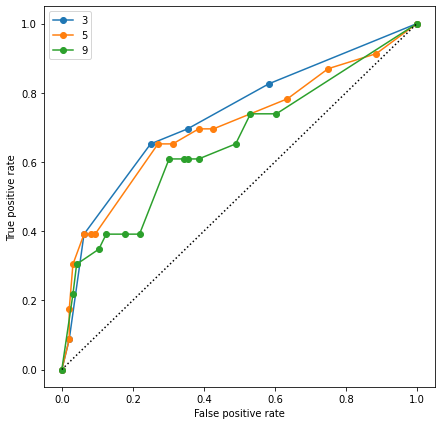

In [17]:
max_depths = [3,5,9]
plt.figure(figsize=(7,7))
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_treino, y_treino)
    fpr,tpr,ths = roc_curve(y_teste, dt.predict_proba(X_teste)[:,1])
    plt.plot(fpr,tpr,marker='o',label=max_depth)
plt.plot([0,1],[0,1],linestyle=':',color='k')
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Note que isso CONFIRMOU o que vimos com o F1 de limiar 0.50. O modelo com profundidade 3 é o melhor pra praticamente todos os limiares!

**MAS CUIDADO!** Nem sempre é assim! Aqui foi, pois esse modelo era melhor SEMPRE. Mas ele poderia ser pior justamente na faixa do 0.50, e ser melhor pra vários outros limiares!

Na prática, olhamos para a **ÁREA SOB A CURVA ROC**, ou **AUC**. Isso vai nos dizer se o modelo é bom em média para TODOS os limiares possíveis! Ou se há *algum limiar que a classificação é melhor*.

# Vamos refazer nosso código?
Mas agora com auc

Vamos usar a `roc_auc_score`

In [18]:
# Leitura da base de dados
import pandas as pd
df = pd.read_csv('2feats.csv') 

# Separação em variável preditiva e variável resposta
X = df[['goout','absences']] 
y = df['target']

# Separação em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3,random_state=42) 

# Busca nos parametros para encontrar o melhor modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
max_depths = [2,3,4,5,6,7,8,9,10] 
aucs = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth,random_state=123)
    dt.fit(X_treino,y_treino)
    y_pred = dt.predict(X_teste)
    auc = roc_auc_score(y_teste, y_pred)
    
    aucs.append( auc )
    print( '{max_depth} - {auc:5.4f}'.format(max_depth=max_depth, auc=aucs[-1]) )

# Qual parametros é o melhor?
import numpy as np
best = max_depths[ np.argmax(aucs) ]

# Ajuste do melhor modelo com a base completa
dt.fit(X, y)

# Salvar o melhor modelo em um arquivo
import joblib
joblib.dump(dt, 'modelo_dt.joblib')

2 - 0.6313
3 - 0.6644
4 - 0.6418
5 - 0.6365
6 - 0.6531
7 - 0.6531
8 - 0.6531
9 - 0.6313
10 - 0.6531


['modelo_dt.joblib']

In [19]:
best

3

Mas e agora??? Como eu escolho O MELHOR LIMIAR, caso isso seja necessário?

Agora podemos voltar para nossa precision recall!! Vamos olhar para como essas métricas se comportam ao longos dos limiares (usando função pronta, claro!)

<ipython-input-20-65f3798634bc>:7: RuntimeWarning: divide by zero encountered in true_divide
  f1 = 2/((1/prec)+(1/rec))


ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

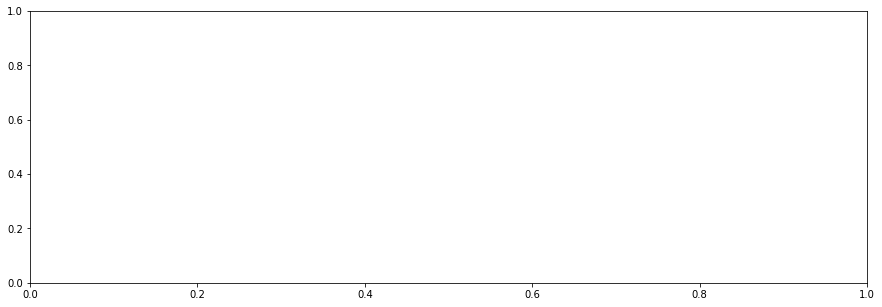

In [20]:
from sklearn.metrics import precision_recall_curve

dt = DecisionTreeClassifier(max_depth=best)
dt.fit(X_treino, y_treino)
prec, rec, ths = precision_recall_curve(y_teste,dt.predict_proba(X_teste)[:,1])

f1 = 2/((1/prec)+(1/rec))

plt.figure(figsize=(15,5))
plt.plot(ths,f1)

OOOOOOOpa Lelê. O que aconteceu aqui?

Essa função varia o limiar calculando o precision e o recall.

Mas para cada valor de precision e recall, ele volta o limiar logo antes e logo depois. Isso faz com que tenhamos um limiar a mais que o necessário.

Pra nossa finalidade, vamos só "jogar fora" o último ponto (sintaxe: `vetor[:-1]`: Pegue todos exceto o último)

<ipython-input-21-883ebe2cc41e>:7: RuntimeWarning: divide by zero encountered in true_divide
  f1 = 2/((1/prec)+(1/rec))


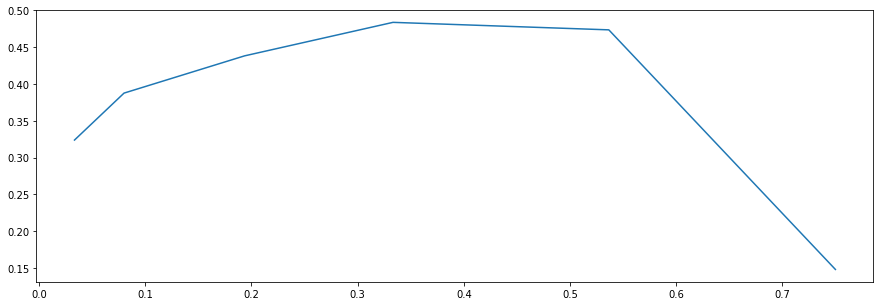

In [21]:
from sklearn.metrics import precision_recall_curve

dt = DecisionTreeClassifier(max_depth=best)
dt.fit(X_treino, y_treino)
prec, rec, ths = precision_recall_curve(y_teste,dt.predict_proba(X_teste)[:,1])

f1 = 2/((1/prec)+(1/rec))

plt.figure(figsize=(15,5))
plt.plot(ths,f1[:-1])

(array([17.44186047,  9.59302326,  0.        ,  0.        ,  0.        ,
         0.        ,  4.36046512,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  7.84883721,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.74418605,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.87209302]),
 array([0.03333333, 0.05722222, 0.08111111, 0.105     , 0.12888889,
        0.15277778, 0.17666667, 0.20055556, 0.22444444, 0.24833333,
        0.27222222, 0.29611111, 0.32      , 0.34388889, 0.36777778,
        0.39166667, 0.41555556, 0.43944444, 0.46333333, 0.48722222,
        0.51111111, 0.535     , 0.55888889, 0.58277778, 0.60666667,
        0.63055556, 0.65444444, 0.67833333, 0.70222222, 0.72611111,
        0.75      ]),
 <BarContainer object of 30 artists>)

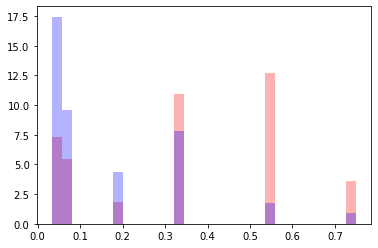

In [22]:
alcolistas  = y_teste==1
nalcolistas = y_teste==0

pred = dt.predict_proba(X_teste)[:,1]

plt.hist(pred[ alcolistas],bins=30,color='r',alpha=.3,density=True)
plt.hist(pred[nalcolistas],bins=30,color='b',alpha=.3,density=True)